In [2]:
# ! pip uninstall umap
# ! pip install umap-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, MaxAbsScaler, Normalizer

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.svm import SVC
# import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import shap
import conorm
import warnings
warnings.filterwarnings("ignore")

# Data prep

In [6]:
def preprocessing_data(original_DESeq2, coldata):
    coldata.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
    coldata = coldata[coldata['Sample_type'] != 'MBM']
    coldata = coldata.reset_index(drop=True)
    coldata['Sample_type'] = coldata['Sample_type'].replace({'HDC': 0, 'GBM': 1})
    coldata = coldata.drop(columns=['BioProject'])

    original_DESeq2 = original_DESeq2.T
    original_DESeq2 = original_DESeq2.set_axis(original_DESeq2.iloc[0], axis=1)
    original_DESeq2 = original_DESeq2[1:]
    original_DESeq2.reset_index(inplace=True)
    bio = pd.merge(original_DESeq2, coldata, on='index')
    bio.rename(columns={'index': 'observation'}, inplace=True)
    return bio

In [7]:
def baseline(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    print(classification_report(y_test, y_pred))

In [8]:
def create_model(X, y, save_model=False, model_name = 'hy'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    print(classification_report(y_test, y_pred))

    if save_model:
        joblib.dump(gbm, model_name)
        print(f"Model saved as {model_name}")

# Normalization

## Baseline

In [9]:
# coldata
coldata_GBM = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\coldata_GBM_HDC.tsv', sep='\t')
coldata = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\coldata.tsv', sep='\t')

# DESeq2
original_DESeq2 = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC_DESeq2.tsv', sep='\t')
CPM_DESeq2 = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC_DESeq2.tsv', sep='\t')

# original
original = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC.tsv', sep='\t')
original_CPM = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC.tsv', sep='\t')

# keep
keep_cpm = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC_keep.tsv', sep='\t')
keep = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC_keep.tsv', sep='\t')

In [10]:
orig = preprocessing_data(original, coldata)
orig_cpm = preprocessing_data(original_CPM, coldata)

In [11]:
orig.head()

,observation,-_ggugccuggcugugggcgg,-_cagaagugauugugguuuuugc,-_gagggcgggggaggagga,-_gccccugcgcgggcggggg,-_cggggccgagcagagggc,-_aaacguaauuguggauuuugcc,-_cuaguaaggacauuugugauuc,-_uaacccauaauauggacaugu,-_cgggggcggggccgagcg,...,-_gagaccaugagguugaggcugcagu,-_cugggagguuacggcugcagu,hsa-miR-6895-5p_cagggccaggcacagaguaag,hsa-miR-499a-5p_uuaagacuugcagugauguuu,-_caaaguuuaagauccuug,hsa-miR-548z_aaaaguaacugagguuuuugcca,hsa-miR-4760-5p_uuuagauugaacaugaaguua,hsa-miR-3652_cggcuggaggugugagga,hsa-miR-3121-5p_ccuuugccuauucuauuuaag,Sample_type
0,SRR11820311,792,56,25,79,106,14,31,20,40,...,0,0,0,0,0,0,0,0,0,0
1,SRR11820312,0,93,6,0,0,23,0,14,9,...,0,0,0,0,0,0,0,0,0,0
2,SRR11820313,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SRR11820314,0,28,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SRR11820315,0,0,0,0,0,11,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = orig.drop(['observation', 'Sample_type'], axis=1)  
y = orig['Sample_type']
X = X.astype(int)
baseline(X, y)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [22]:
create_model(X, y, save_model=True, model_name="direct_model.pkl")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

Model saved as direct_model.pkl


In [107]:
X = orig_cpm.drop(['observation', 'Sample_type'], axis=1)  
y = orig_cpm['Sample_type']
X = X.astype(int)

baseline(X, y)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.89      0.89      0.89        19

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



# Feature importance

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)


feature_importances = gbm.feature_importances_


feature_importance_dict = dict(zip(X.columns, feature_importances))


sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_importance[:10]

[('-_gagcacaugagguugaggcugcagu', 0.5271442199991199),
 ('hsa-miR-3184-5p_aaagucucgcucucugccccuca', 0.19228116340935042),
 ('hsa-miR-188-5p_caucccuugcaugguggaggg', 0.04219065635914635),
 ('hsa-miR-4525_ggggggaugugcaugcugguu', 0.03589224991970004),
 ('hsa-miR-4269_gcaggcacagacagcccugg', 0.025903120532604223),
 ('hsa-miR-541-5p_uggugggcacagaaucuggacu', 0.019248412851308103),
 ('hsa-miR-3920_acugauuaucuuaacucucuga', 0.018643920649664067),
 ('-_ugaucaggcaaaauugcag', 0.017281841225416594),
 ('-_uguugggauucagcaggac', 0.009657224609719628),
 ('hsa-miR-627-5p_ucuuuucuuugagacucacu', 0.008567979832564382)]

## 1. Permutation Importance

In [48]:
permutation_importance_dict = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
perm_sorted_idx = perm_importance.importances_mean.argsort()[::-1]


# Populate the permutation importance dictionary
for i, idx in enumerate(perm_sorted_idx[:10]):
    permutation_importance_dict[X.columns[idx]] = perm_importance.importances_mean[idx]

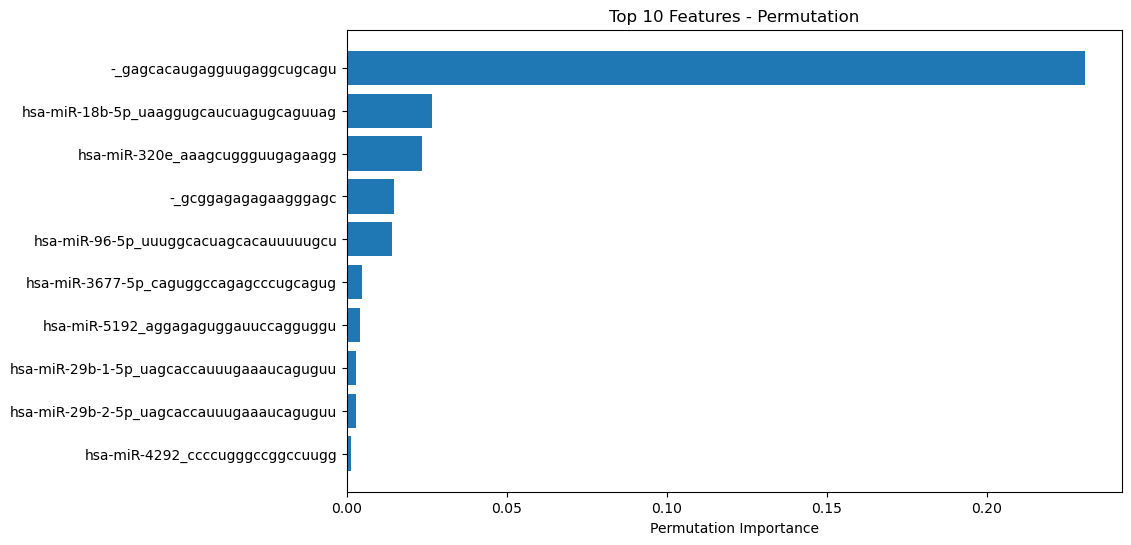

In [49]:
def plot_top_10_features(importance_dict, method_name):
    top_features = list(importance_dict.keys())[:10]
    top_importance = list(importance_dict.values())[:10]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importance)
    plt.xlabel(f"{method_name} Importance")
    plt.title(f"Top 10 Features - {method_name}")
    plt.gca().invert_yaxis()
    plt.show()

# Plot the top 10 important features for each method
plot_top_10_features(permutation_importance_dict, "Permutation")

## 2. Coefficients in Linear Models (Logistic Regression)

In [51]:
logistic_regression_coef_dict = {}
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
coef_sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# Populate the logistic regression coefficients dictionary
for i, idx in enumerate(coef_sorted_idx[:10]):
    logistic_regression_coef_dict[X.columns[idx]] = np.abs(coefficients[idx])

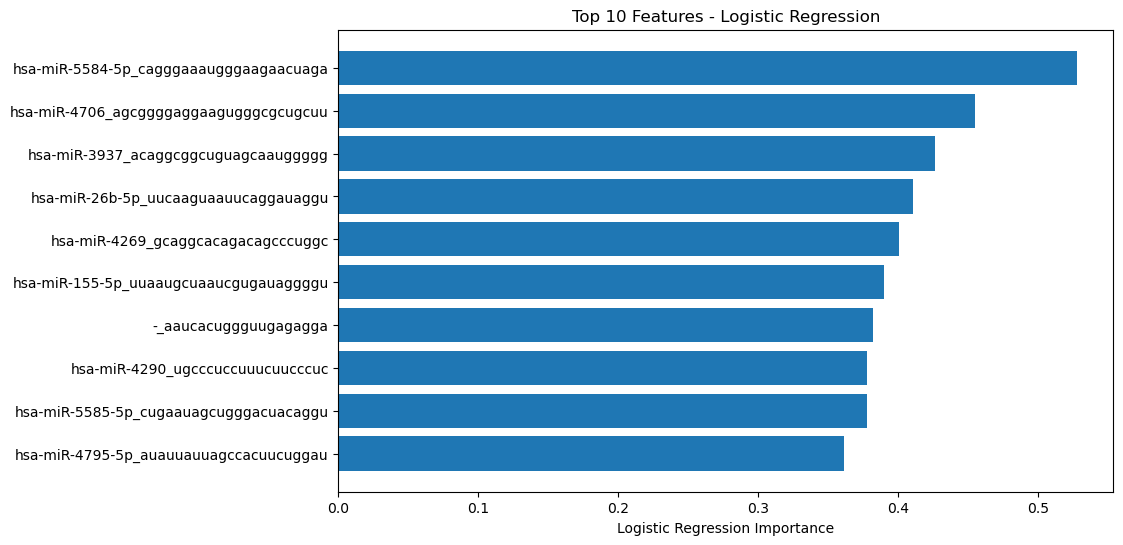

In [52]:
plot_top_10_features(logistic_regression_coef_dict, "Logistic Regression")

## 3. Recursive Feature Elimination (RFE)

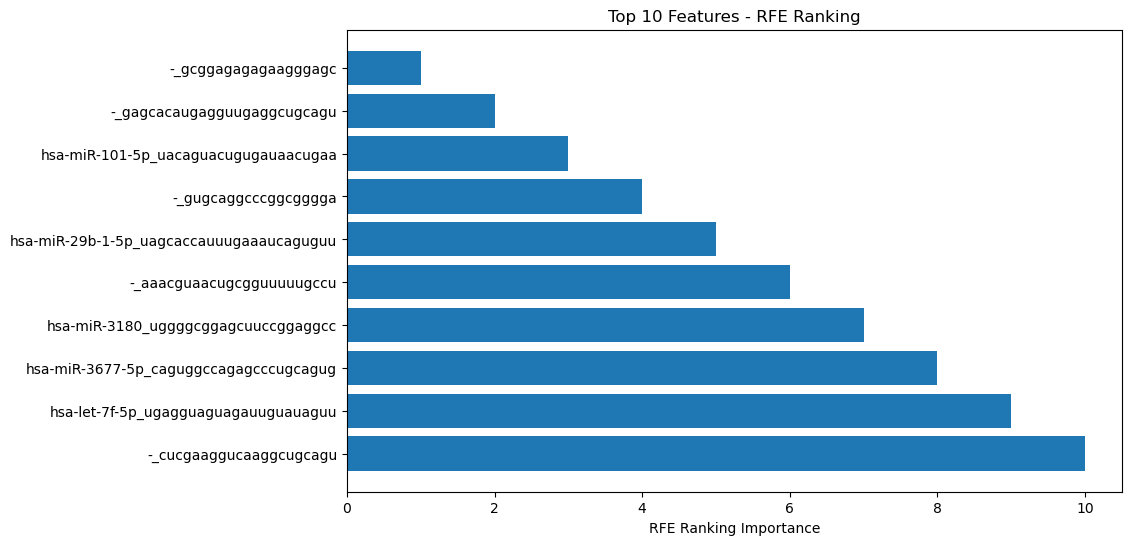

In [54]:
rfe_ranking_dict = {}
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)
rfe_sorted_idx = np.argsort(fit.ranking_)

# Populate the RFE rankings dictionary
for i, idx in enumerate(rfe_sorted_idx[:10]):
    rfe_ranking_dict[X.columns[idx]] = fit.ranking_[idx]
plot_top_10_features(rfe_ranking_dict, "RFE Ranking")

## 4. L1 Regularization (Lasso)

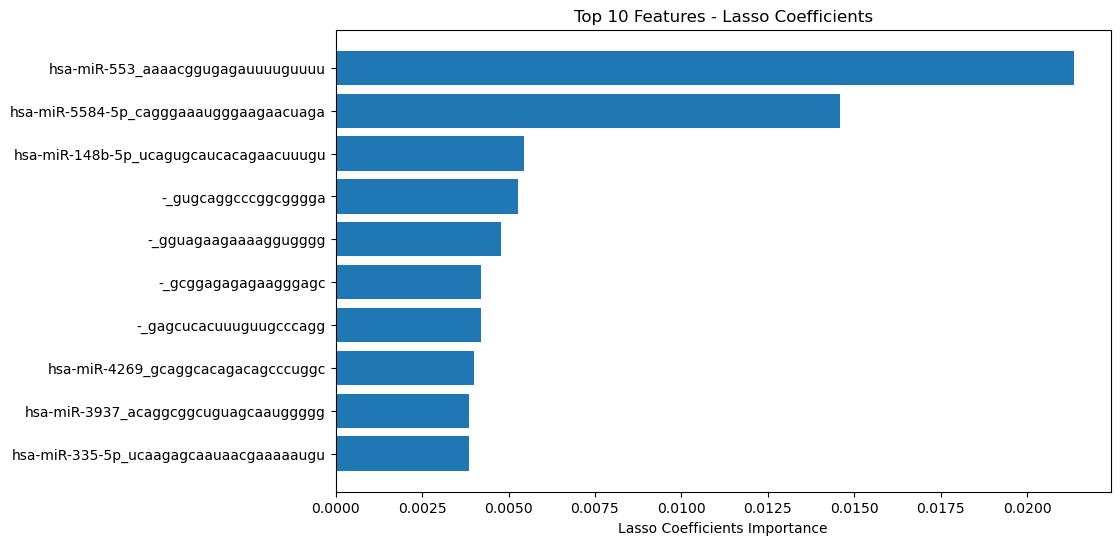

In [55]:
lasso_coef_dict = {}
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)
lasso_coef = model.coef_[0]
lasso_sorted_idx = np.argsort(np.abs(lasso_coef))[::-1]

# Populate the Lasso coefficients dictionary
for i, idx in enumerate(lasso_sorted_idx[:10]):
    lasso_coef_dict[X.columns[idx]] = np.abs(lasso_coef[idx])
plot_top_10_features(lasso_coef_dict, "Lasso Coefficients")

## All 4 methods combined

In [62]:
# Create an empty dictionary to store the combined feature importances
combined_feature_importance = {}

# Combine the feature importances from each method into the combined dictionary
for feature, importance in sorted_feature_importance[:10]:
    combined_feature_importance[feature] = combined_feature_importance.get(feature, 0) + importance

for feature, importance in permutation_importance_dict.items():
    combined_feature_importance[feature] = combined_feature_importance.get(feature, 0) + importance

for feature, importance in logistic_regression_coef_dict.items():
    combined_feature_importance[feature] = combined_feature_importance.get(feature, 0) + importance

for feature, importance in rfe_ranking_dict.items():
    combined_feature_importance[feature] = combined_feature_importance.get(feature, 0) + importance

for feature, importance in lasso_coef_dict.items():
    combined_feature_importance[feature] = combined_feature_importance.get(feature, 0) + importance

# Optionally, you can normalize the combined importances
total_importance = sum(combined_feature_importance.values())
combined_feature_importance = {feature: importance / total_importance for feature, importance in combined_feature_importance.items()}

# Sort the combined feature importance dictionary by importance (descending)
sorted_combined_feature_importance = dict(sorted(combined_feature_importance.items(), key=lambda item: item[1], reverse=True))

# Now, sorted_combined_feature_importance contains the combined and sorted feature importance scores across all methods.
# You can access and use this dictionary for further analysis or visualization.

In [63]:
sorted_combined_feature_importance

{'-_cucgaaggucaaggcugcagu': 0.1656279208165362,
 'hsa-let-7f-5p_ugagguaguagauuguauaguu': 0.1490651287348826,
 'hsa-miR-3677-5p_caguggccagagcccugcagug': 0.13304576007971536,
 'hsa-miR-3180_uggggcggagcuuccggaggcc': 0.11593954457157535,
 '-_aaacguaacugcgguuuuugccu': 0.09937675248992173,
 'hsa-miR-29b-1-5p_uagcaccauuugaaaucaguguu': 0.08285812785381917,
 '-_gugcaggcccggcgggga': 0.06633867454090481,
 'hsa-miR-101-5p_uacaguacugugauaacugaa': 0.049688376244960863,
 '-_gagcacaugagguugaggcugcagu': 0.045866850764295024,
 '-_gcggagagagaagggagc': 0.017422193452947394,
 'hsa-miR-5584-5p_cagggaaaugggaagaacuaga': 0.008978471172551128,
 'hsa-miR-4269_gcaggcacagacagcccuggc': 0.008504572568126326,
 'hsa-miR-4706_agcggggaggaagugggcgcugcuu': 0.007536434830852468,
 'hsa-miR-3937_acaggcggcuguagcaauggggg': 0.007131044553426792,
 'hsa-miR-26b-5p_uucaaguaauucaggauaggu': 0.006797059421690953,
 'hsa-miR-155-5p_uuaaugcuaaucgugauaggggu': 0.006461452565696766,
 '-_aaucacuggguugagagga': 0.006321448823027127,
 'hsa-miR

## 5. Shap values

In [131]:
explainer = shap.Explainer(gbm, X_train)
shap_values = explainer(X_test)

In [132]:
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_dict = dict(zip(X_test.columns, mean_abs_shap_values))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
most_important_rnas = [feature for feature, importance in sorted_feature_importance]

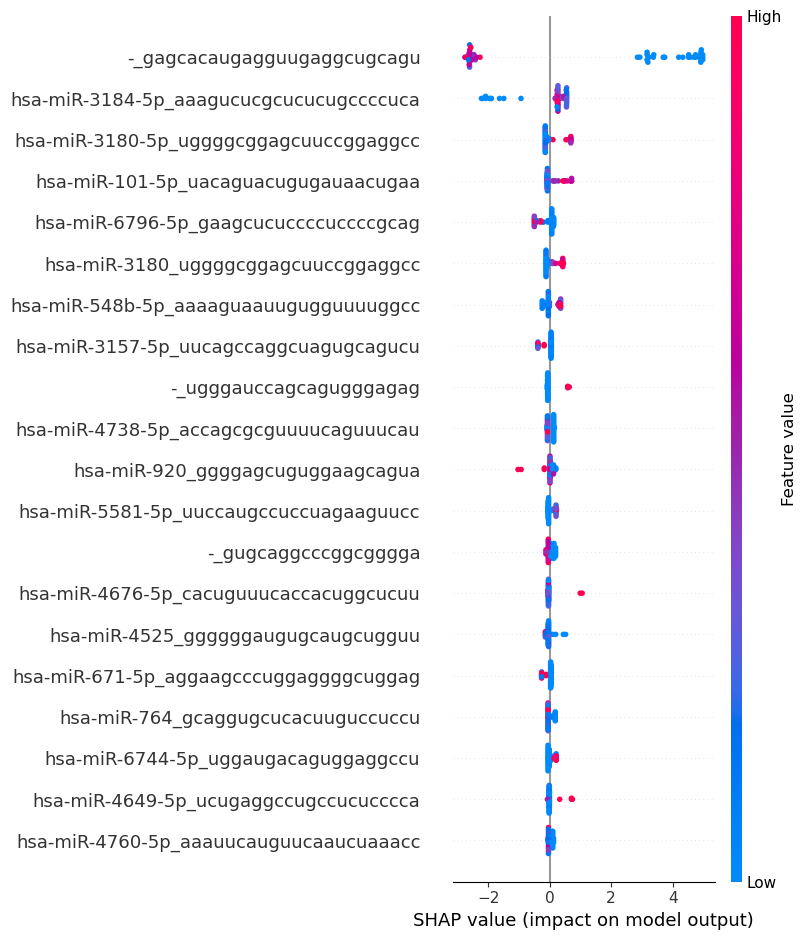

In [133]:
shap.summary_plot(shap_values, X_test)

In [136]:

file_path = 'C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features.txt'

with open(file_path, 'w') as file:
    for rna in most_important_rnas:
        file.write(f"{rna}\n")


print(f"The most important RNAs have been saved to {file_path}.")

The most important RNAs have been saved to C:\Users\Tseh\Documents\Bio_project\Data\Shap_features.txt.


---

# Dimensions 

## PCA

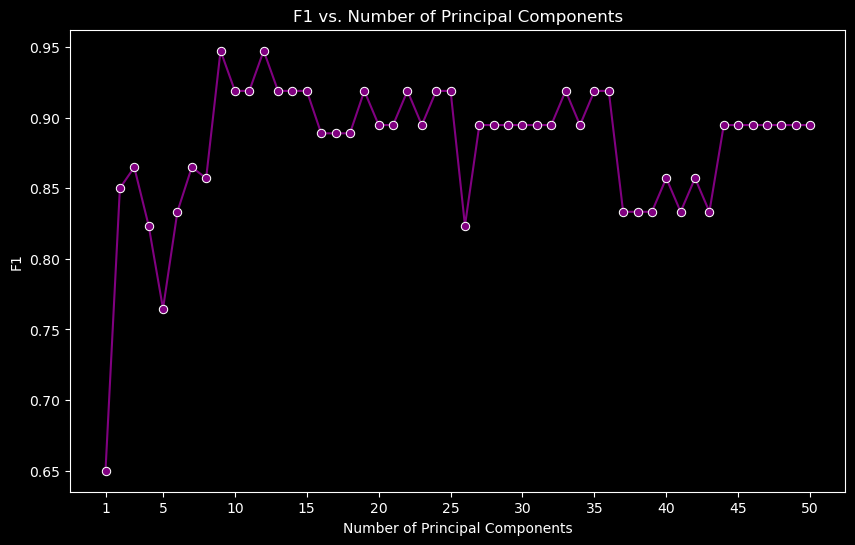

In [54]:
f1_scores = []  

n_components_range = range(1, 51)

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_pca.fit(X_train_pca, y_train)

    y_pred_pca = gbm_pca.predict(X_test_pca)

    f1_pca = f1_score(y_test, y_pred_pca)  
    f1_scores.append(f1_pca) 

sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor': 'black', 'axes.edgecolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'text.color': 'white'})

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_components_range, y=f1_scores, marker='o', color='purple')
plt.title('F1 vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('F1')
plt.grid(False)  

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.show()

## t-SNE

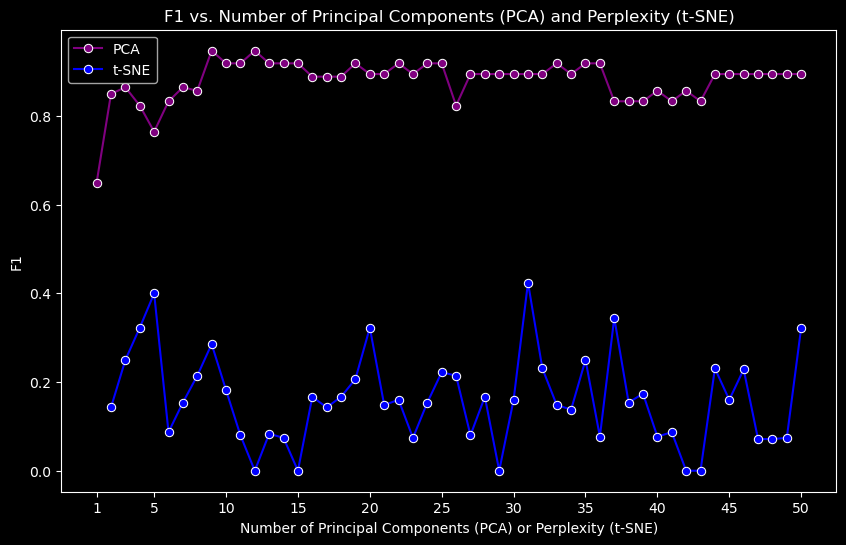

In [56]:
f1_scores_tsne = []
perplexity_range = range(2, 51)

for perplexity in perplexity_range:
    tsne = TSNE(n_components=2, method='exact', perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    X_train_tsne = X_tsne[:len(X_train)]
    X_test_tsne = X_tsne[len(X_train):]

    gbm_tsne = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_tsne.fit(X_train_tsne, y_train)

    y_pred_tsne = gbm_tsne.predict(X_test_tsne)

    f1_score_tsne = f1_score(y_test, y_pred_tsne)
    f1_scores_tsne.append(f1_score_tsne)

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_components_range, y=f1_scores_pca, marker='o', color='purple', label='PCA')
sns.lineplot(x=perplexity_range, y=f1_scores_tsne, marker='o', color='blue', label='t-SNE')
plt.title('F1 vs. Number of Principal Components (PCA) and Perplexity (t-SNE)')
plt.xlabel('Number of Principal Components (PCA) or Perplexity (t-SNE)')
plt.ylabel('F1')
plt.grid(False)  

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

## UMAP

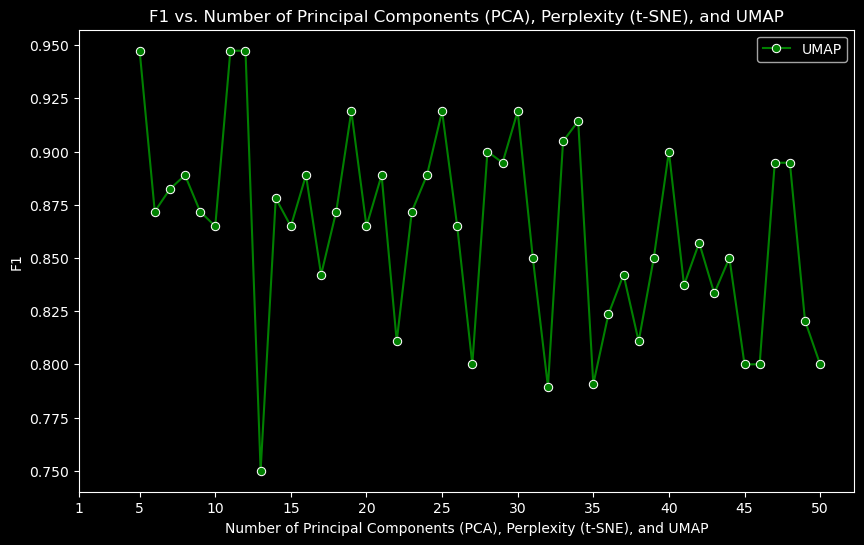

In [57]:
n_neighbors_range = range(5, 51)
f1_scores_umap = []
for n_neighbors in n_neighbors_range:
    
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, metric='euclidean')
    X_umap = reducer.fit_transform(X)

    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)
    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

    y_pred_umap = gbm_umap.predict(X_test_umap)

    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_neighbors_range, y=f1_scores_umap, marker='o', color='green', label='UMAP')
plt.title('F1 vs. Number of Principal Components (PCA), Perplexity (t-SNE), and UMAP')
plt.xlabel('Number of Principal Components (PCA), Perplexity (t-SNE), and UMAP')
plt.ylabel('F1')
plt.grid(False)

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

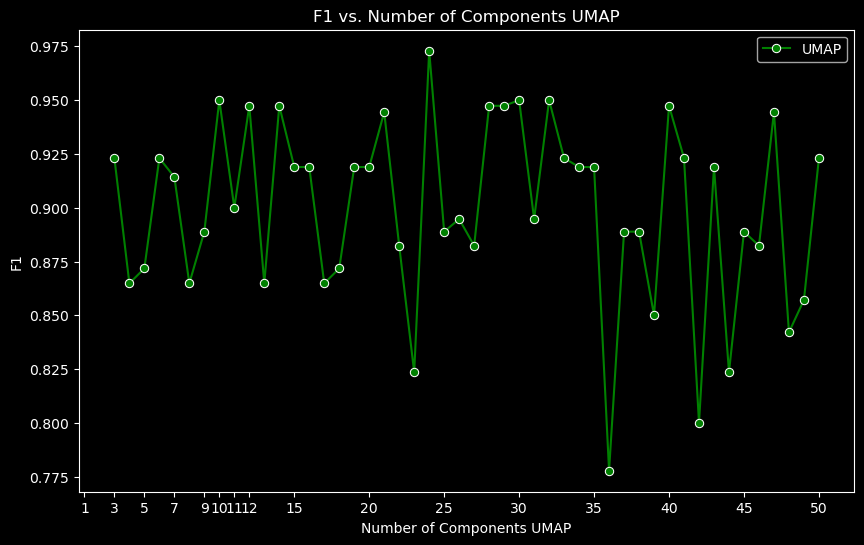

In [59]:
f1_scores_umap = []
n_components_range = range(3, 51)
for n_components in n_components_range:
    
    reducer = umap.UMAP(n_neighbors=11, n_components=n_components, metric='euclidean')
    X_umap = reducer.fit_transform(X)


    
    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)


    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

 
    y_pred_umap = gbm_umap.predict(X_test_umap)

  
    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_components_range, y=f1_scores_umap, marker='o', color='green', label='UMAP')
plt.title('F1 vs. Number of Components UMAP')
plt.xlabel('Number of Components UMAP')
plt.ylabel('F1')
plt.grid(False) 

custom_ticks = [1, 3, 5, 7, 9, 10, 11, 12, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

## All methods

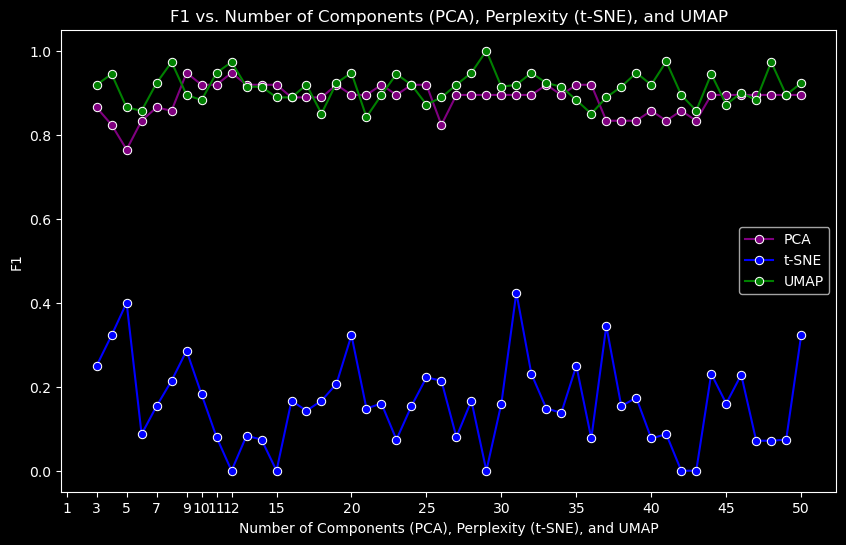

In [60]:
f1_scores_pca = []
f1_scores_tsne = []
f1_scores_umap = []

n_components_range = range(3, 51)
perplexity_range = range(3, 51)
n_components_range_umap = range(3, 51)




for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_pca.fit(X_train_pca, y_train)

    y_pred_pca = gbm_pca.predict(X_test_pca)

    f1_score_pca = f1_score(y_test, y_pred_pca)
    f1_scores_pca.append(f1_score_pca)



for perplexity in perplexity_range:
    tsne = TSNE(n_components=2, method='exact', perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    X_train_tsne = X_tsne[:len(X_train)]
    X_test_tsne = X_tsne[len(X_train):]

    gbm_tsne = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_tsne.fit(X_train_tsne, y_train)

    y_pred_tsne = gbm_tsne.predict(X_test_tsne)

    f1_score_tsne = f1_score(y_test, y_pred_tsne)
    f1_scores_tsne.append(f1_score_tsne)

for n_components_umap in n_components_range_umap:
    reducer = umap.UMAP(n_neighbors=11, n_components=n_components_umap, metric='euclidean')
    X_umap = reducer.fit_transform(X)

    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)

    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

    y_pred_umap = gbm_umap.predict(X_test_umap)

    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_components_range, y=f1_scores_pca, marker='o', color='purple', label='PCA')
sns.lineplot(x=perplexity_range, y=f1_scores_tsne, marker='o', color='blue', label='t-SNE')
sns.lineplot(x=n_components_range_umap, y=f1_scores_umap, marker='o', color='green', label='UMAP')

plt.title('F1 vs. Number of Components (PCA), Perplexity (t-SNE), and UMAP')
plt.xlabel('Number of Components (PCA), Perplexity (t-SNE), and UMAP')
plt.ylabel('F1')
plt.grid(False)

custom_ticks = [1, 3, 5, 7, 9, 10, 11, 12, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

In [32]:
# UMAP
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)
X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)
gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_umap.fit(X_train_umap, y_train)
y_pred_umap = gbm_umap.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [29]:
# PCA
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_pca.fit(X_train_pca, y_train)

y_pred_pca = gbm_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Таким образом, UMAP с числом соседей в 11 и числом компонент в 30 является оптимальным значением

# ML algorithms comparison

In [33]:
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)

In [49]:
algorithms = [
    (GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting"),
    (SVC(kernel='linear', C=1.0, random_state=42), "Support Vector Machine"),
    (LogisticRegression(solver='liblinear', random_state=42), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (AdaBoostClassifier(n_estimators=50, random_state=42), "AdaBoost"),
    (BaggingClassifier(n_estimators=100, random_state=42), "Bagging"),
    (ExtraTreesClassifier(n_estimators=100, random_state=42), "Extra Trees"),
    (XGBClassifier(n_estimators=100, random_state=42), "XGBoost"),
    (LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "LightGBM")
]


for model, model_name in algorithms:
    model.fit(X_umap, y)
    cross_val_scores = cross_val_score(model, X_umap, y, cv=5)
    print(f"{model_name} - Mean CV Score: {round(cross_val_scores.mean(), 3)}")

Gradient Boosting - Mean CV Score: 0.825
Support Vector Machine - Mean CV Score: 0.707
Logistic Regression - Mean CV Score: 0.679
Random Forest - Mean CV Score: 0.796
K-Nearest Neighbors - Mean CV Score: 0.752
Naive Bayes - Mean CV Score: 0.695
Decision Tree - Mean CV Score: 0.804
AdaBoost - Mean CV Score: 0.813
Bagging - Mean CV Score: 0.809
Extra Trees - Mean CV Score: 0.796
XGBoost - Mean CV Score: 0.772
LightGBM - Mean CV Score: 0.776


# Model tuning

In [68]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}


cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y)) 
train_preds = np.zeros(len(y))  
models = []

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_umap, y), 1):
    print(f"Training with fold {fold_} started")

    model = GradientBoostingClassifier(random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

    train_X, val_X = X_umap[train_idx], X_umap[val_idx]
    train_y, val_y = y[train_idx], y[val_idx]

    start_time = time.time()

    grid_search.fit(train_X, train_y)

    end_time = time.time()

    oof[val_idx] = grid_search.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += grid_search.predict_proba(train_X)[:, 1] / (cv.n_splits - 1)

    models.append(grid_search)

    print(f"Training with fold {fold_} completed in {end_time - start_time:.2f} seconds")


best_params = models[0].best_params_
best_model = models[0]
print("Best Hyperparameters:", best_params)

Training with fold 1 started
Training with fold 1 completed in 115.47 seconds
Training with fold 2 started
Training with fold 2 completed in 105.14 seconds
Training with fold 3 started
Training with fold 3 completed in 105.15 seconds
Training with fold 4 started
Training with fold 4 completed in 105.71 seconds
Training with fold 5 started
Training with fold 5 completed in 104.80 seconds
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'subsample': 1.0}


In [71]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}



cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y)) 
train_preds = np.zeros(len(y)) 
best_score = 0
best_model = None
best_params = None


for fold_, (train_idx, val_idx) in enumerate(cv.split(X_umap, y), 1):
    print(f"Training with fold {fold_} started")

  
    model = GradientBoostingClassifier(random_state=42)

  
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

  
    train_X, val_X = X_umap[train_idx], X_umap[val_idx]
    train_y, val_y = y[train_idx], y[val_idx]

    start_time = time.time()

   
    grid_search.fit(train_X, train_y)

    end_time = time.time()


    oof[val_idx] = grid_search.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += grid_search.predict_proba(train_X)[:, 1] / (cv.n_splits - 1)

 
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

    print(f"Training with fold {fold_} completed in {end_time - start_time:.2f} seconds")


print("Best Hyperparameters:", best_params)
print("Best Mean CV Score:", round(best_score, 3))

Training with fold 1 started
Training with fold 1 completed in 122.92 seconds
Training with fold 2 started
Training with fold 2 completed in 123.81 seconds
Training with fold 3 started
Training with fold 3 completed in 125.07 seconds
Training with fold 4 started
Training with fold 4 completed in 141.52 seconds
Training with fold 5 started
Training with fold 5 completed in 140.97 seconds
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Best Mean CV Score: 0.847


In [89]:
models[4].best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [84]:
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)
X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)

gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=42)
gbm_umap.fit(X_train_umap, y_train)
y_pred_umap = gbm_umap.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



---

# Model on most important features

In [147]:
X = orig.drop(['observation', 'Sample_type'], axis=1)  
y = orig['Sample_type']
X = X.astype(int)
baseline(X, y)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [78]:
with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features.txt', 'r') as file:
    lines = file.readlines() 
first_30_lines = [line.strip() for line in lines[:27]]
X_filtered = X[first_30_lines]
baseline(X_filtered, y)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



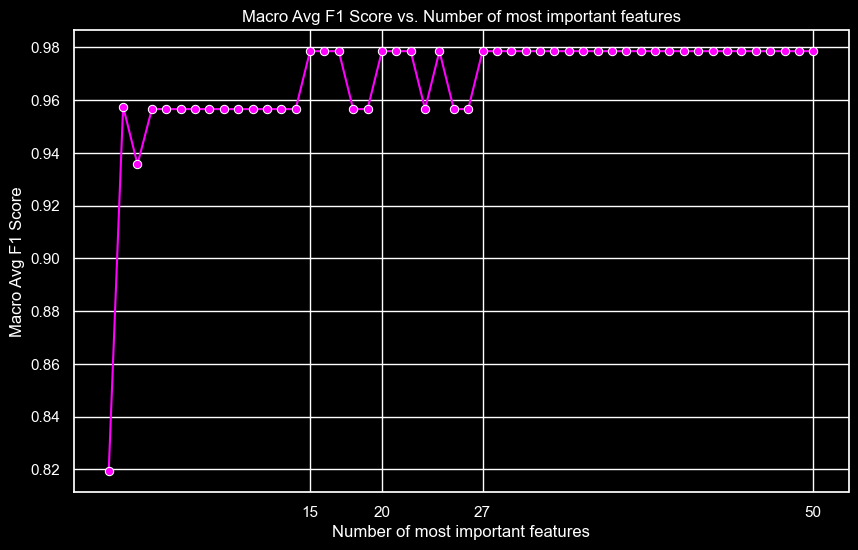

In [148]:
def base(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features.txt', 'r') as file:
    lines = file.readlines()

f1_scores = []
for i in range(1, 51):
    selected_lines = [line.strip() for line in lines[:i]]
    X_filtered = X[selected_lines]
    f1_score = base(X_filtered, y)
    f1_scores.append(f1_score)

    
plt.figure(figsize=(10, 6)) 

sns.set_theme(style="darkgrid", rc={"axes.edgecolor": 'white', 'figure.facecolor': 'black', 'axes.facecolor': 'black'})
sns.lineplot(x=range(1, 51), y=f1_scores, marker='o', color='magenta')

plt.title('Macro Avg F1 Score vs. Number of most important features', color='white')
plt.xlabel('Number of most important features', color='white')
plt.ylabel('Macro Avg F1 Score', color='white')

custom_ticks = [15, 20, 27, 50]
plt.xticks(custom_ticks, color='white')
plt.yticks(color='white')
plt.show()

# Model check

In [133]:
# coldata
coldata_GBM = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\coldata_GBM_HDC.tsv', sep='\t')
coldata = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\coldata.tsv', sep='\t')

# DESeq2
original_DESeq2 = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC_DESeq2.tsv', sep='\t')
CPM_DESeq2 = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC_DESeq2.tsv', sep='\t')

# original
original = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC.tsv', sep='\t')
original_CPM = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC.tsv', sep='\t')

# keep
keep_cpm = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cpm_GBM_HDC_keep.tsv', sep='\t')
keep = pd.read_csv('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\cts_GBM_HDC_keep.tsv', sep='\t')

In [150]:
X

,-_ggugccuggcugugggcgg,-_cagaagugauugugguuuuugc,-_gagggcgggggaggagga,-_gccccugcgcgggcggggg,-_cggggccgagcagagggc,-_aaacguaauuguggauuuugcc,-_cuaguaaggacauuugugauuc,-_uaacccauaauauggacaugu,-_cgggggcggggccgagcg,-_auuaaggacauuugugguugau,...,hsa-miR-3135b_ggcuggagcgagugcaguggug,-_gagaccaugagguugaggcugcagu,-_cugggagguuacggcugcagu,hsa-miR-6895-5p_cagggccaggcacagaguaag,hsa-miR-499a-5p_uuaagacuugcagugauguuu,-_caaaguuuaagauccuug,hsa-miR-548z_aaaaguaacugagguuuuugcca,hsa-miR-4760-5p_uuuagauugaacaugaaguua,hsa-miR-3652_cggcuggaggugugagga,hsa-miR-3121-5p_ccuuugccuauucuauuuaag
0,792,56,25,79,106,14,31,20,40,34,...,0,0,0,0,0,0,0,0,0,0
1,0,93,6,0,0,23,0,14,9,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,28,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,11,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Original CPM

In [136]:
def important_features_check(df, number_of_features):
    X = df.drop(['observation', 'Sample_type'], axis=1)  
    y = df['Sample_type']
    X = X.astype(int)
    print('Classification report on original data: ')
    baseline(X, y)
    
    with open('C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\Shap_features.txt', 'r') as file:
        lines = file.readlines() 
    important_features = [line.strip() for line in lines[:number_of_features]]
    X_filtered = X[important_features]
    print('Classification report on only important features: ')
    baseline(X_filtered, y)

In [132]:
orig_cpm = preprocessing_data(original_CPM, coldata)
important_features_check(orig_cpm)

Classification report on original data: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.89      0.89      0.89        19

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

Classification report on only important features: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



# New Bedgraph file

## Reading data

In [25]:
columns = ["chrom", "start", "end", "column1", "column2", "column3"]
normal = pd.read_table("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657836_Sample1.bedgraph",
                    header=None,
                    names=columns,
                    skiprows=1,  
                    delim_whitespace=True,
                    low_memory=False) 
normal.rename(columns={'column1': 'observation 1', 'column2': 'observation 2', 'column3': 'observation 3',}, inplace=True)
print(normal.head())

  chrom  start    end  column1  column2  column3
0     1  10469  10470        0        0        4
1     1  10483  10484      100        1        0
2     1  10488  10489      100        2        0
3     1  10492  10493        0        0        2
4     1  10496  10497      100        2        0


In [30]:
def rename_chrom(row):
    return f"{row['chrom']}_{row['start']}_{row['end']}"

def open_bedgraph(filename, normal_or_cancer):
    columns = ["chrom", "start", "end", "column1", "column2", "column3"]
    normal = pd.read_table(filename,
                        header=None,
                        names=columns,
                        skiprows=1,  
                        delim_whitespace=True,
                        low_memory=False) 
    normal.rename(columns={'column1': 'observation 1', 'column2': 'observation 2', 'column3': 'observation 3',}, inplace=True)
    normal['chrom'] = normal.apply(rename_chrom, axis=1)
    normal = normal.drop(columns = ['start', 'end'])
    normal = normal.T
    normal = normal.set_axis(normal.iloc[0], axis=1)
    normal = normal[1:]
    normal['Sample_type'] = normal_or_cancer
    return normal

In [4]:
df1 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657836_Sample1.bedgraph", 0)
df2 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657837_Sample2.bedgraph", 0) 
df3 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657838_Sample3.bedgraph", 0)
df4 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657839_Sample4.bedgraph", 0) 
df5 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657840_Sample5.bedgraph", 1)
df6 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657841_Sample6.bedgraph", 1) 
df7 = open_bedgraph("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\GSM7657842_Sample7.bedgraph", 1)

In [38]:
dataframes = [df1, df2, df3, df4, df5, df6, df7]
columns_dfs = [set(df.columns) for df in dataframes]
common_columns = list(set.intersection(*columns_dfs))
new_dataframes = [df[common_columns] for df in dataframes]
new_combined_df = pd.concat(new_dataframes, axis=0, ignore_index=True)

sample_type_column = new_combined_df['Sample_type']
new_combined_df.drop(columns=['Sample_type'], inplace=True)
new_combined_df['Sample_type'] = sample_type_column
new_combined_df.head()

chrom 10_95919795_95919796 3_90995605_90995606 KI270442.1_381031_381032  \
0                       85                 100                       25   
1                       61                  25                        1   
2                       10                   0                        3   
3                       72                 100                        0   
4                       27                  11                        0   

chrom 16_46390742_46390743 11_39665160_39665161 7_22707705_22707706  \
0                       81                   92                 100   
1                      126                   12                  10   
2                       29                    1                   0   
3                       82                  100                 100   
4                       69                    9                  16   

chrom 16_46399484_46399485 GL000220.1_120412_120413 3_76023417_76023418  \
0                       90                     

In [45]:
new_combined_df.to_csv("C:\\Users\\Tseh\\Documents\\Bio_project\\Data\\new_combined_data.csv", index=False)